# Autocorrelation

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/AirPassengers.csv",index_col="Month",parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


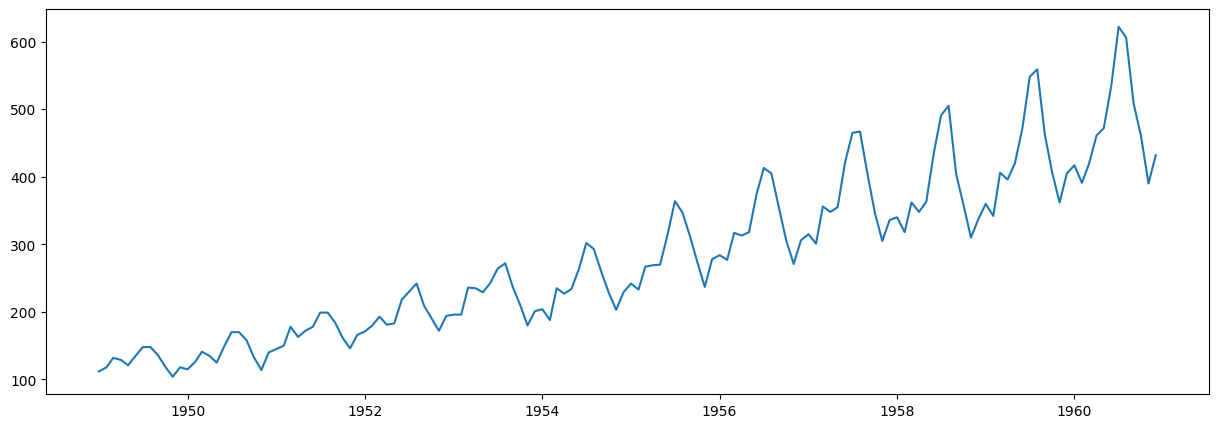

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df)

In [ ]:
df["Passengers_Diff"]=df["Passengers"].diff(periods=1)
df

,Passengers,Passengers_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [ ]:
df=df.dropna()

In [ ]:
df

,Passengers,Passengers_Diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


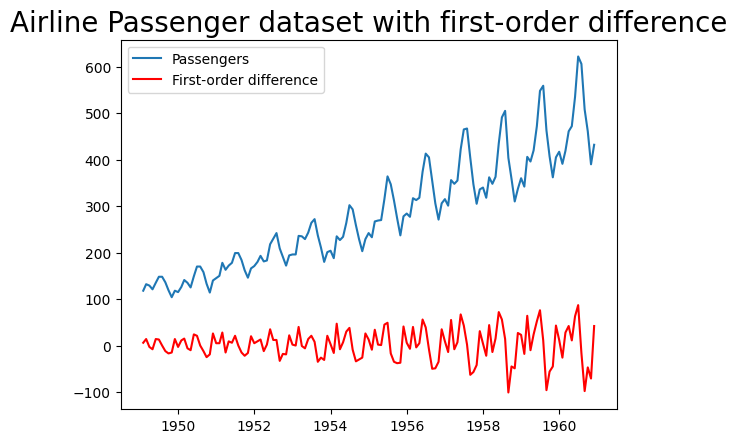

In [ ]:
plt.title("Airline Passenger dataset with first-order difference",size=20)
plt.plot(df["Passengers"],label="Passengers")
plt.plot(df["Passengers_Diff"],label="First-order difference",color="red")
plt.legend()

In [ ]:
acf_values=acf(df["Passengers_Diff"])
np.round(acf_values,2)

array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

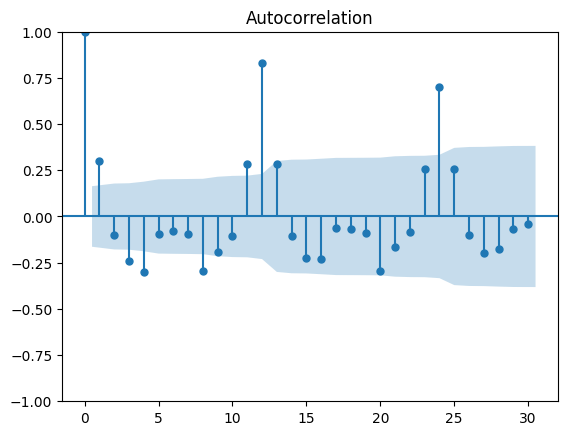

In [ ]:
plot_acf(df["Passengers_Diff"],lags=30);


In [ ]:
pacf_values=pacf(df["Passengers_Diff"])
np.round(pacf_values,2)

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

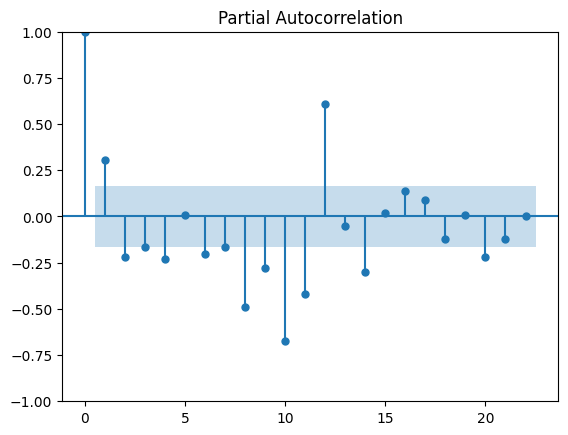

In [ ]:
plot_pacf(df["Passengers_Diff"]);